<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1Qz6xEAqkCSjzOizc4jKNbbOqv9-6Oz5B" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **Detección de bordes**

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files


## Algunas funcines de apoyo

In [2]:
def subir_imagen():
    # Pedir al usuario que seleccione un archivo
    uploaded = files.upload()

    # Obtener el nombre del archivo y su contenido
    file_name = next(iter(uploaded))
    file_content = uploaded[file_name]

    # Definir el directorio donde se almacenará el archivo (en Google Colab)
    target_dir = '/content/imagenes'
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Almacenar el archivo en el directorio especificado
    file_path = os.path.join(target_dir, file_name)
    with open(file_path, 'wb') as f:
        f.write(file_content)

    return file_path


In [3]:
def leer_imagen(path):
    # Leer la imagen utilizando OpenCV
    image = cv2.imread(path)
    if image is None:
       raise ValueError("No se pudo leer la imagen. Asegúrate de que la ruta sea correcta y la imagen exista.")
    return image

## Cargando una imagen

❗La imagen que cargemos será la usada en el resto del *notebook*.

--2023-10-29 17:43:32--  https://raw.githubusercontent.com/FranPuentes/iTI2024/main/media/joven.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241356 (236K) [image/png]
Saving to: ‘joven.png’

joven.png           100%[===================>] 235.70K  --.-KB/s    in 0.04s   

2023-10-29 17:43:33 (5.63 MB/s) - ‘joven.png’ saved [241356/241356]



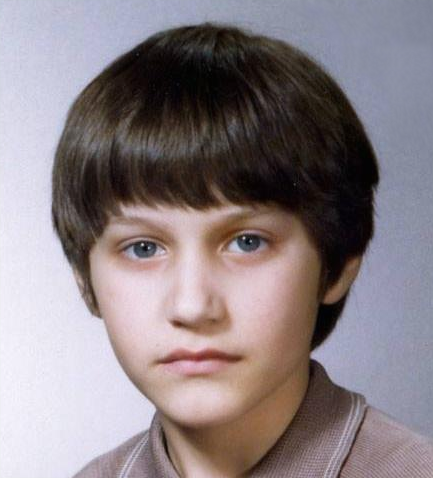

In [4]:
# Llamar a la función para pedir el archivo y obtener el path almacenado
#ruta = subir_imagen()

!wget https://raw.githubusercontent.com/FranPuentes/iTI2024/main/media/joven.png -O joven.png
ruta="joven.png"

imagen = leer_imagen(ruta)

# Mostrar la imagen original
cv2_imshow(imagen)

## Usando filtros para detectar bordes

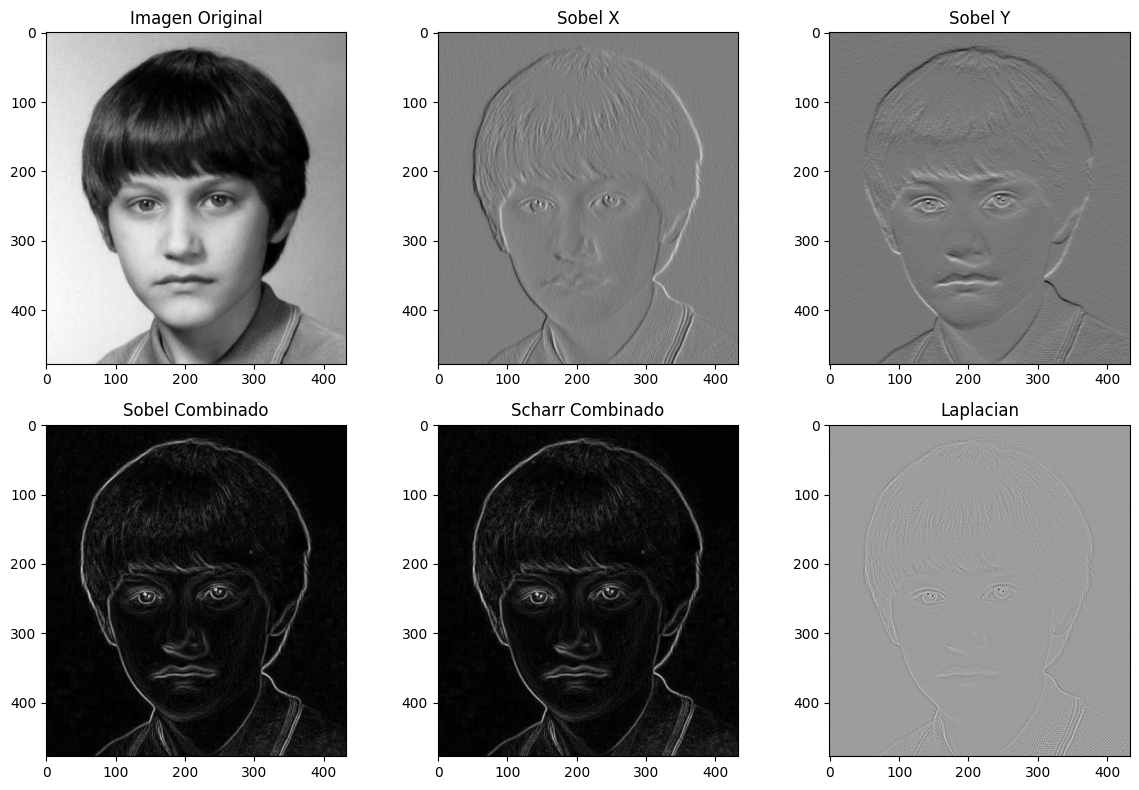

In [5]:
import numpy as np

# Cargar la imagen en escala de grises
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB);
image      = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2GRAY)

# Aplicar el filtro Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Aplicar el filtro Scharr
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
scharr_combined = cv2.magnitude(scharr_x, scharr_y)

# Aplicar el filtro Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Mostrar las imágenes con los bordes detectados
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(2, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(2, 3, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combinado')

plt.subplot(2, 3, 5)
plt.imshow(scharr_combined, cmap='gray')
plt.title('Scharr Combinado')

plt.subplot(2, 3, 6)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')

plt.tight_layout()
plt.show()


## '*Cartoonizando*' una imagen.


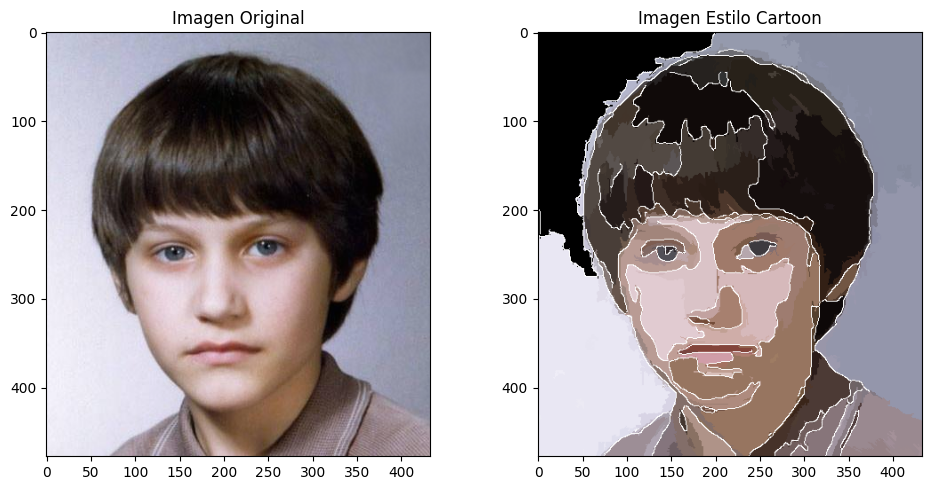

In [6]:
from skimage.segmentation import felzenszwalb
from skimage import io, color

image = imagen_rgb.copy();

# Apply the felzenszwalb segmentation
segments_fz = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
# Convert to a cartoon version
image = color.label2rgb(segments_fz, image, kind='avg')

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Aplicar un filtro de mediana para reducir detalles
smoothed_image = cv2.medianBlur(gray_image, 5)

# Difuminar la imagen para obtener bordes suavizados
blurred_image = cv2.GaussianBlur(smoothed_image, (7, 7), 0)

# Detectar los bordes utilizando el filtro de Canny
edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

# Crear una imagen en blanco con el mismo tamaño que la imagen original
cartoon_image = np.zeros_like(image)

# Pintar las regiones detectadas como bordes con colores sólidos
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
for i in range(3):
    cartoon_image[:, :, i] = cv2.bitwise_and(image[:, :, i], cv2.bitwise_not(edges))
    cartoon_image[:, :, i] = cv2.add(cartoon_image[:, :, i], edges)

# Mostrar la imagen original y la imagen estilo cartoon
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(cartoon_image)
plt.title('Imagen Estilo Cartoon')

plt.tight_layout()
plt.show()
